In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [71]:
mainpath = "C:/Users/Guany/Documents/"
filename = "Covid19.csv"
fullpath = os.path.join(mainpath,filename)

In [72]:
data = pd.read_csv(fullpath)

In [73]:
data.tail()

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,fecha_fallecimiento,asistencia_respiratoria_mecanica,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion
2468514,999994,M,39.0,Años,Argentina,Tierra del Fuego,Río Grande,Tierra del Fuego,NaN,2020-06-01,...,NaN,NO,94,Público,Caso Descartado,Descartado,94,2020-06-01,7,2020-10-19
2468515,999995,M,33.0,Años,Argentina,Formosa,Pilcomayo,Formosa,NaN,2020-06-01,...,NaN,NO,34,Público,Caso confirmado por laboratorio - No Activo po...,Confirmado,34,2020-06-12,49,2020-10-19
2468516,999996,M,42.0,Años,Argentina,CABA,SIN ESPECIFICAR,CABA,NaN,2020-06-01,...,NaN,NO,2,Privado,Caso Descartado,Descartado,2,2020-06-01,0,2020-10-19
2468517,999997,F,30.0,Años,Argentina,CABA,SIN ESPECIFICAR,Córdoba,NaN,2020-06-01,...,NaN,NO,14,Público,Caso Descartado,Descartado,2,2020-06-02,0,2020-10-19
2468518,999999,F,57.0,Años,Argentina,Buenos Aires,General San Martín,Buenos Aires,2020-05-29,2020-06-01,...,NaN,NO,6,Público,Caso Descartado,Descartado,6,2020-06-02,371,2020-10-19


In [74]:
data["edad_años_meses"].unique()

array(['Años', 'Meses'], dtype=object)

In [75]:
pd.isnull(data["edad_años_meses"]).values.ravel().sum()

0

In [78]:
pd.isnull(data["edad"]).values.ravel().sum()

0

In [77]:
data["edad"] = data["edad"].fillna(int(data["edad"].mean()))

In [22]:
data["edad"].describe()

count    2.468519e+06
mean     3.964013e+01
std      1.881870e+01
min      0.000000e+00
25%      2.700000e+01
50%      3.700000e+01
75%      5.100000e+01
max      1.944000e+03
Name: edad, dtype: float64

In [85]:
df = data[data['edad'] > 105]
data.drop(data[data.edad>=105].index, inplace = True)

In [108]:
df.edad.replace((119,110,112,118,109,220,1024,1944,131), (37,37,37,37,37,37,37,37,37), inplace=True)

In [109]:
df["edad"].value_counts()

37.0    238
Name: edad, dtype: int64

In [69]:
for i in range(len(data["edad"])):
        if (data["edad_años_meses"][i]) == ("Meses"):
            data["edad"][i] = 1
        #if (data["edad_años_meses"][i] == "Años") & (data["edad"][i] > 105):
         #   data["edad"][i] = [0]

C:\Users\Guany\.conda\envs\python-ml-2020\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

In [42]:
data["residencia_pais_nombre"].value_counts()

Argentina               2369488
SIN ESPECIFICAR           98599
Paraguay                    112
Bolivia                      96
Brasil                       51
Chile                        48
Uruguay                      33
Italia                       14
Perú                         12
España                        9
Alemania                      9
Francia                       8
Venezuela                     7
China                         5
Australia                     3
EE.UU.                        3
Reino Unido                   3
Malasia                       2
Ecuador                       2
Austria                       2
Colombia                      2
República Dominicana          1
Panamá                        1
Bélgica                       1
Ucrania                       1
Canadá                        1
Líbano                        1
Irlanda                       1
Países Bajos                  1
Portugal                      1
Polonia                       1
Filipina

In [37]:
len(data["edad"])

2468519

In [48]:
type(data["edad"])

numpy.float64

In [55]:
len(data["edad"])

2468519

In [74]:
cont = 0
for i in range(len(data["edad"])):
    a = data["edad"][i]
    b = int(data["edad"][i])
    if (a-b) > 0:
                            cont += 1
cont                    

0

In [75]:
print(cont)

0


In [ ]:
for i in range(len(data["edad"])):
    (data["edad"][i]) = int(data["edad"][i])

In [12]:
data.shape

(2468519, 25)

In [6]:
data.columns

Index(['id_evento_caso', 'sexo', 'edad', 'edad_años_meses',
       'residencia_pais_nombre', 'residencia_provincia_nombre',
       'residencia_departamento_nombre', 'carga_provincia_nombre',
       'fecha_inicio_sintomas', 'fecha_apertura', 'sepi_apertura',
       'fecha_internacion', 'cuidado_intensivo', 'fecha_cui_intensivo',
       'fallecido', 'fecha_fallecimiento', 'asistencia_respiratoria_mecanica',
       'carga_provincia_id', 'origen_financiamiento', 'clasificacion',
       'clasificacion_resumen', 'residencia_provincia_id', 'fecha_diagnostico',
       'residencia_departamento_id', 'ultima_actualizacion'],
      dtype='object')

In [39]:
data.describe()

,id_evento_caso,edad,sepi_apertura,carga_provincia_id,residencia_provincia_id,residencia_departamento_id
count,2.468519e+06,2.466226e+06,2.468519e+06,2.468519e+06,2.468519e+06,2.468519e+06
mean,2.225209e+06,3.964073e+01,3.435215e+01,2.090618e+01,2.165322e+01,2.431117e+02
std,7.906795e+05,1.882743e+01,6.324782e+00,2.827136e+01,2.830506e+01,2.650229e+02
min,6.720640e+05,0.000000e+00,5.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
25%,1.547910e+06,2.700000e+01,3.100000e+01,2.000000e+00,6.000000e+00,2.100000e+01
50%,2.242387e+06,3.700000e+01,3.600000e+01,6.000000e+00,6.000000e+00,9.100000e+01
75%,2.909662e+06,5.100000e+01,3.900000e+01,2.600000e+01,2.600000e+01,4.340000e+02
max,3.567796e+06,1.944000e+03,4.400000e+01,9.400000e+01,9.900000e+01,8.820000e+02


In [10]:
data.dtypes

id_evento_caso                        int64
sexo                                 object
edad                                float64
edad_años_meses                      object
residencia_pais_nombre               object
residencia_provincia_nombre          object
residencia_departamento_nombre       object
carga_provincia_nombre               object
fecha_inicio_sintomas                object
fecha_apertura                       object
sepi_apertura                         int64
fecha_internacion                    object
cuidado_intensivo                    object
fecha_cui_intensivo                  object
fallecido                            object
fecha_fallecimiento                  object
asistencia_respiratoria_mecanica     object
carga_provincia_id                    int64
origen_financiamiento                object
clasificacion                        object
clasificacion_resumen                object
residencia_provincia_id               int64
fecha_diagnostico               

In [14]:
data["sexo"].unique()

array(['M', 'F', 'NR'], dtype=object)

In [18]:
pd.isnull(data["sexo"]).values.ravel().sum()

0

In [19]:
pd.isnull(data["fecha_diagnostico"]).values.ravel().sum()

358929

In [25]:
type(data["fecha_diagnostico"][1])

str

In [26]:
len(data["fecha_diagnostico"])

2468519

In [49]:
len(data["edad"])

2468519

In [27]:
datafechas = data

In [31]:
datafechas["fecha_diagnostico"] = datafechas["fecha_diagnostico"].fillna(method="ffill")

In [32]:
len(datafechas["fecha_diagnostico"])

2468519

In [45]:
pd.isnull(datafechas["fecha_diagnostico"]).values.ravel().sum()

0

In [42]:
datafechas["fecha_diagnostico"]= pd.to_datetime(datafechas["fecha_diagnostico"])

In [43]:
datafechas.dtypes

id_evento_caso                               int64
sexo                                        object
edad                                       float64
edad_años_meses                             object
residencia_pais_nombre                      object
residencia_provincia_nombre                 object
residencia_departamento_nombre              object
carga_provincia_nombre                      object
fecha_inicio_sintomas                       object
fecha_apertura                              object
sepi_apertura                                int64
fecha_internacion                           object
cuidado_intensivo                           object
fecha_cui_intensivo                         object
fallecido                                   object
fecha_fallecimiento                         object
asistencia_respiratoria_mecanica            object
carga_provincia_id                           int64
origen_financiamiento                       object
clasificacion                  

In [44]:
type(datafechas["fecha_diagnostico"][1])

pandas._libs.tslibs.timestamps.Timestamp

In [18]:
data["origen_financiamiento"].value_counts()

Público    1522449
Privado     946070
Name: origen_financiamiento, dtype: int64

Text(0.5,1,'Histograma de distribucion de pacientes covid')

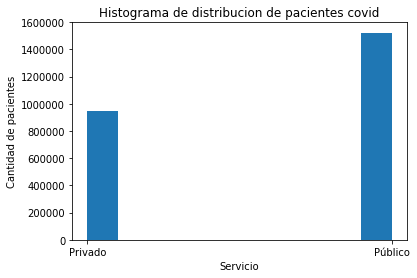

In [21]:
plt.hist(data["origen_financiamiento"])
# k= int(np.ceil(1+np.log2(3333))) 
#3333 es la cantidad de filas que tiene el dataframe, "Regla de Sturges"
#plt.hist(data["Day Calls"], bins=1+lnp.log2(3333))
plt.xlabel("Servicio")
plt.ylabel("Cantidad de pacientes")
plt.title("Histograma de distribucion de pacientes covid")

Text(0.5,1,'Histograma de distribucion de pacientes covid')

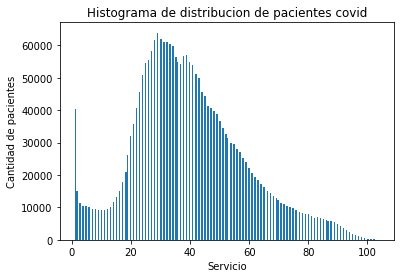

In [101]:
plt.hist(data["edad"], bins= 200)
# k= int(np.ceil(1+np.log2(3333))) 
#3333 es la cantidad de filas que tiene el dataframe, "Regla de Sturges"
#plt.hist(data["Day Calls"], bins=1+lnp.log2(3333))
plt.xlabel("Servicio")
plt.ylabel("Cantidad de pacientes")
plt.title("Histograma de distribucion de pacientes covid")

Text(0.5,1,'Boxplot de las llamadas diarias')

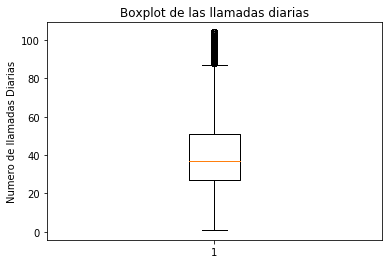

In [92]:
plt.boxplot(data["edad"])
plt.ylabel("Numero de llamadas Diarias")
plt.title("Boxplot de las llamadas diarias")

In [95]:
data["edad"].describe()

count    2.468263e+06
mean     3.958940e+01
std      1.883033e+01
min      1.000000e+00
25%      2.700000e+01
50%      3.700000e+01
75%      5.100000e+01
max      1.040000e+02
Name: edad, dtype: float64

In [96]:
data["edad"].mode()

0    29.0
dtype: float64

In [98]:
data["edad"].value_counts()

29.0     63922
30.0     62058
28.0     61723
32.0     61091
31.0     60981
33.0     60384
34.0     59776
27.0     58297
39.0     56949
38.0     56751
35.0     56329
26.0     55604
36.0     54914
40.0     54782
25.0     54422
37.0     54228
41.0     53816
42.0     51050
24.0     50981
43.0     49897
44.0     45671
23.0     45503
45.0     44370
46.0     41199
22.0     40693
47.0     40664
1.0      40433
48.0     39734
49.0     38936
50.0     36693
         ...  
76.0      9157
9.0       9141
77.0      8735
78.0      8257
80.0      7975
79.0      7890
81.0      7393
83.0      6898
82.0      6835
84.0      6588
85.0      6468
86.0      6051
87.0      5745
88.0      5655
89.0      5380
90.0      4741
91.0      4112
92.0      3515
93.0      3087
94.0      2450
95.0      1897
96.0      1521
97.0      1128
98.0       801
99.0       512
100.0      344
101.0      150
102.0      100
103.0       50
104.0       32
Name: edad, Length: 104, dtype: int64